In [1]:
library(gprofiler2)
library(ggplot2)
library(RColorBrewer)

In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/gene_expression_correlation_cluster_summaries.csv"
df = read.csv(filename, row.names=1)

In [3]:
head(df)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16
ENSG00000000003_TSPAN6,-0.03278743,-0.02595152,-0.019489200,0.20812960,0.17928511,-0.088145315,-0.040269599,-0.158662375,0.15397092,-0.22751871,-0.156336242,-0.07582469,-0.123315748,0.16045604,-0.036377457,-0.002197800,0.228378584
ENSG00000000419_DPM1,-0.08145661,-0.11340380,0.019654544,0.20310854,0.29530274,-0.079552321,0.021093978,-0.151843105,0.20247987,-0.20891601,-0.224050465,-0.14857201,-0.027481700,0.13360443,-0.011352074,0.019903492,0.183526454
ENSG00000000457_SCYL3,0.01138163,-0.01006154,0.003808672,0.01177544,0.03234050,-0.047882180,0.007956968,-0.001453939,0.03135984,-0.01929688,-0.008375386,-0.03011747,0.000307631,0.02226312,0.007341185,-0.010535033,0.004225529
ENSG00000000460_C1orf112,-0.02364342,-0.13402487,0.078225980,0.06275032,0.18055390,-0.049309400,0.016680058,-0.039126612,0.12964136,-0.06779328,-0.143645815,-0.09973966,0.053287117,0.06215576,0.005501806,0.004165092,0.025859535
ENSG00000001036_FUCA2,-0.22178467,-0.18145921,0.149194493,0.25267897,0.19711342,-0.007098826,0.256418349,-0.072815457,0.20619317,-0.28575780,0.044347077,0.01882798,-0.076504633,0.31591438,-0.251135733,0.212603173,-0.085116960
ENSG00000001084_GCLC,-0.04837921,-0.06994902,0.096400635,0.09821645,0.02199214,0.053369134,0.059449915,-0.008822399,0.02540003,-0.09170745,-0.055233689,0.09582720,-0.011069014,0.09428823,-0.118771810,0.092344802,-0.003718091


In [ ]:
########### Genes positively correlated with cluster summary profiles

In [4]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.4]
    if (length(genes_pos)==0){next}
    # order
    genes_pos = genes_pos[order(genes_pos, decreasing = T)]
    # get gene names only
    genes = gsub(".*_","",names(genes_pos))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [5]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

In [6]:
length(pats)

[1] 119

In [7]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [8]:
# df_to_plot

In [9]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster2",
                                       "cluster7", "cluster0", "cluster11", "cluster14",
                                       "cluster8", "cluster15"))

[1] "cluster0"  "cluster2"  "cluster3"  "cluster4"  "cluster5"  "cluster6" 
 [7] "cluster7"  "cluster8"  "cluster9"  "cluster10" "cluster11" "cluster12"
[13] "cluster13" "cluster14" "cluster15" "cluster16"

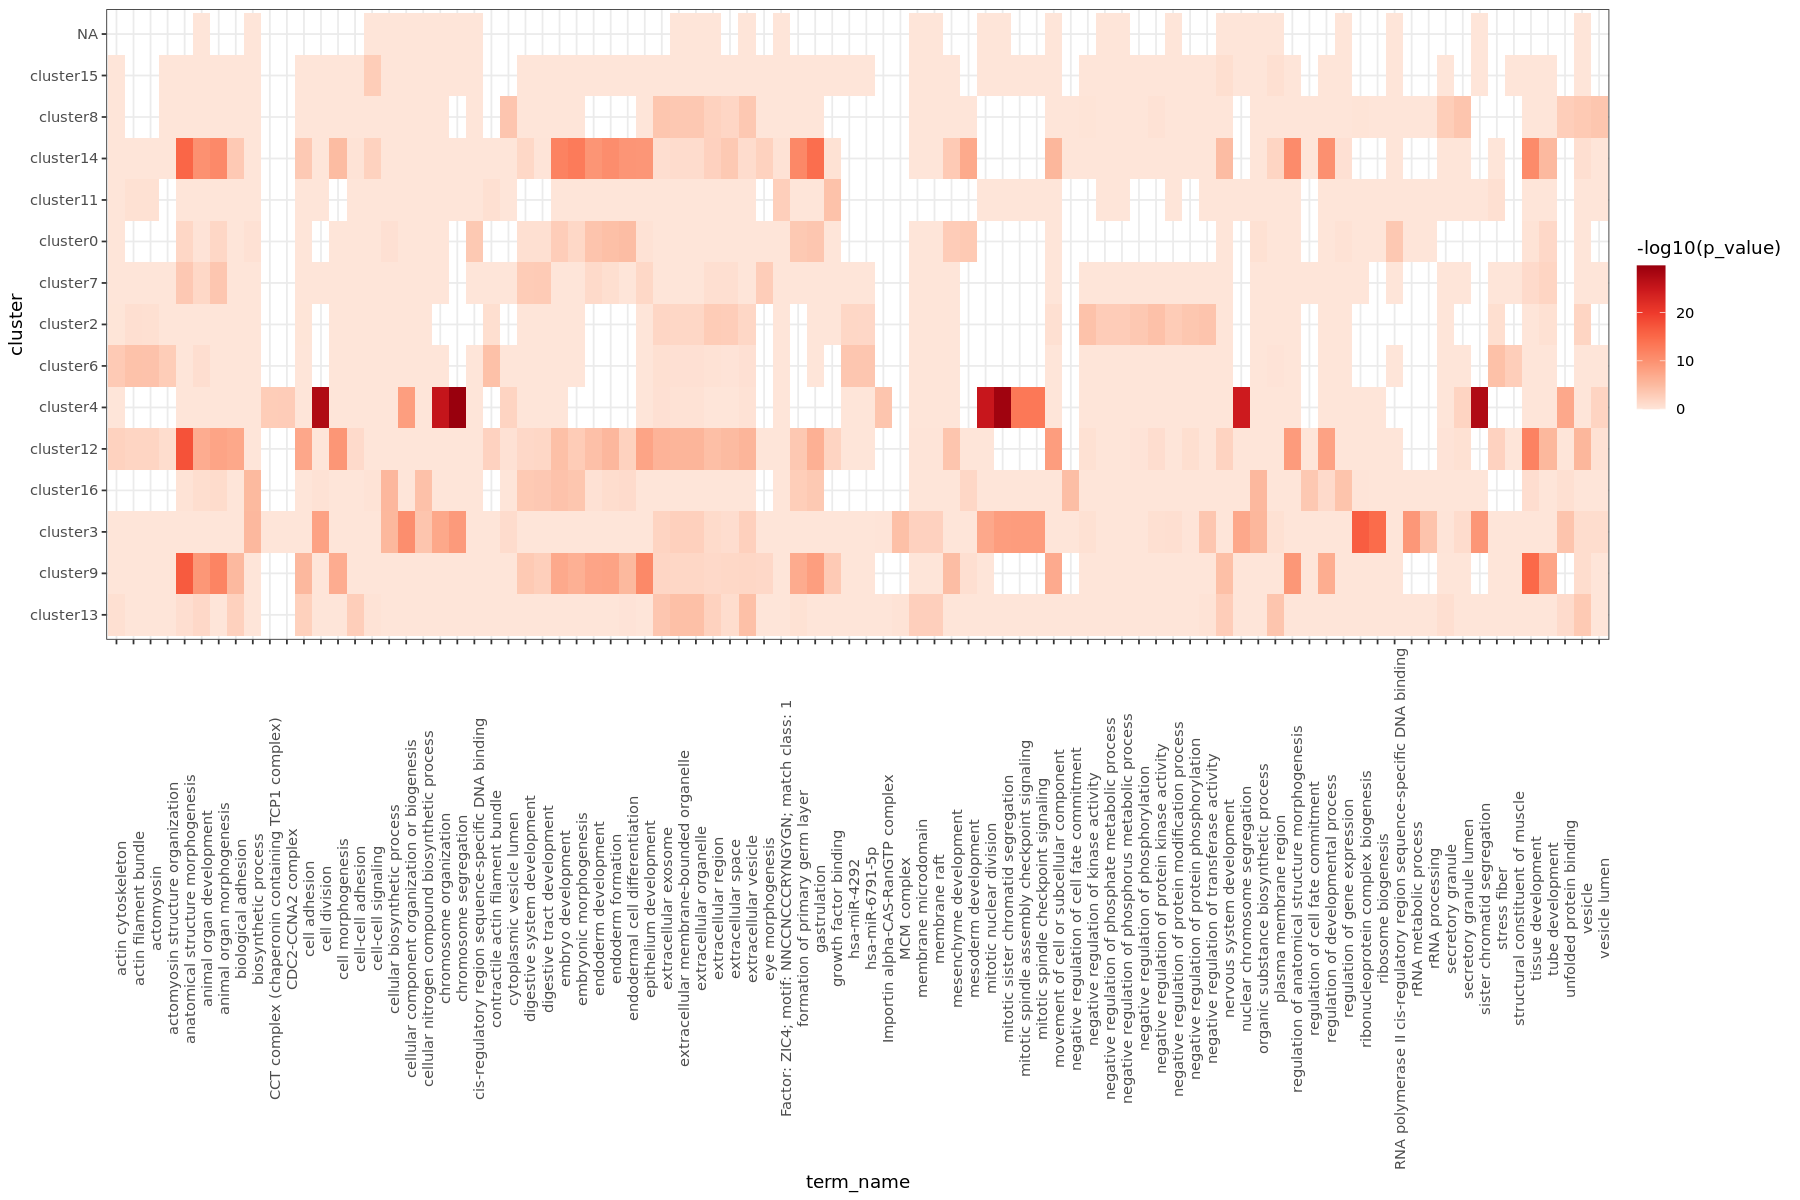

In [10]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [ ]:
########### Genes negatively correlated with cluster summary profiles

In [11]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
#     print(head(gene_list))
    # get negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.4)]
    if (length(genes_neg)==0){next}
    # order
    genes_neg = genes_neg[order(genes_neg)]
    # get gene names only
    genes = gsub(".*_","",names(genes_neg))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [12]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 114

In [13]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [14]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster7", 
                                        "cluster0", "cluster11", "cluster14","cluster5", "cluster15"))

[1] "cluster0"  "cluster1"  "cluster3"  "cluster4"  "cluster5"  "cluster6" 
 [7] "cluster7"  "cluster8"  "cluster9"  "cluster10" "cluster11" "cluster12"
[13] "cluster13" "cluster14" "cluster15" "cluster16"

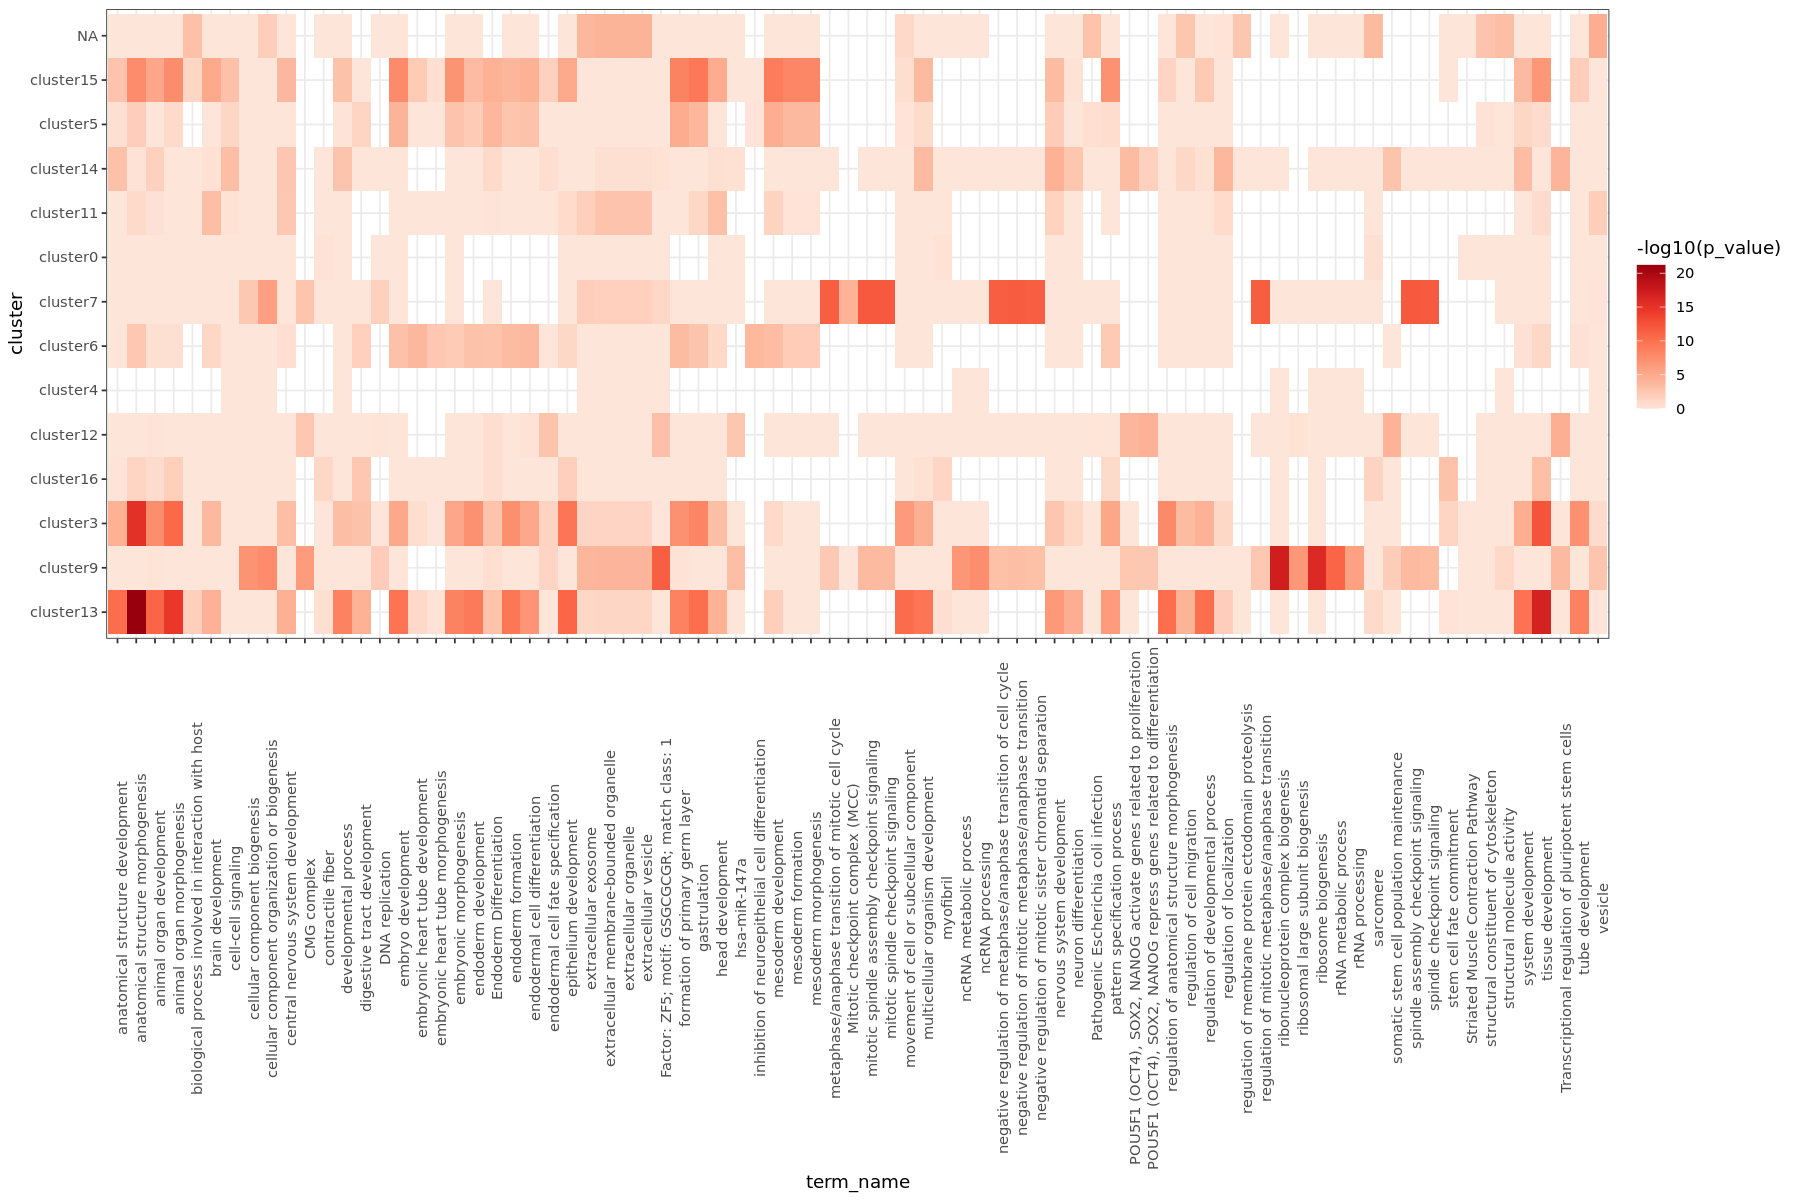

In [15]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [ ]:
########### Genes either positively or negatively correlated with cluster summary profiles

In [16]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.4]
    # AND negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.4)]
    genes_corr = c(genes_pos, genes_neg)
    genes_corr = abs(genes_corr)
    if (length(genes_corr)==0){next}
    # order
    genes_corr = genes_corr[order(genes_corr,decreasing=TRUE)]
    # get gene names only
    genes = gsub(".*_","",names(genes_corr))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [17]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 157

In [18]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [19]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster2", "cluster7", 
                                        "cluster0", "cluster11", "cluster14","cluster5", "cluster15"))

[1] "cluster0"  "cluster1"  "cluster2"  "cluster3"  "cluster4"  "cluster5" 
 [7] "cluster6"  "cluster7"  "cluster8"  "cluster9"  "cluster10" "cluster11"
[13] "cluster12" "cluster13" "cluster14" "cluster15" "cluster16"

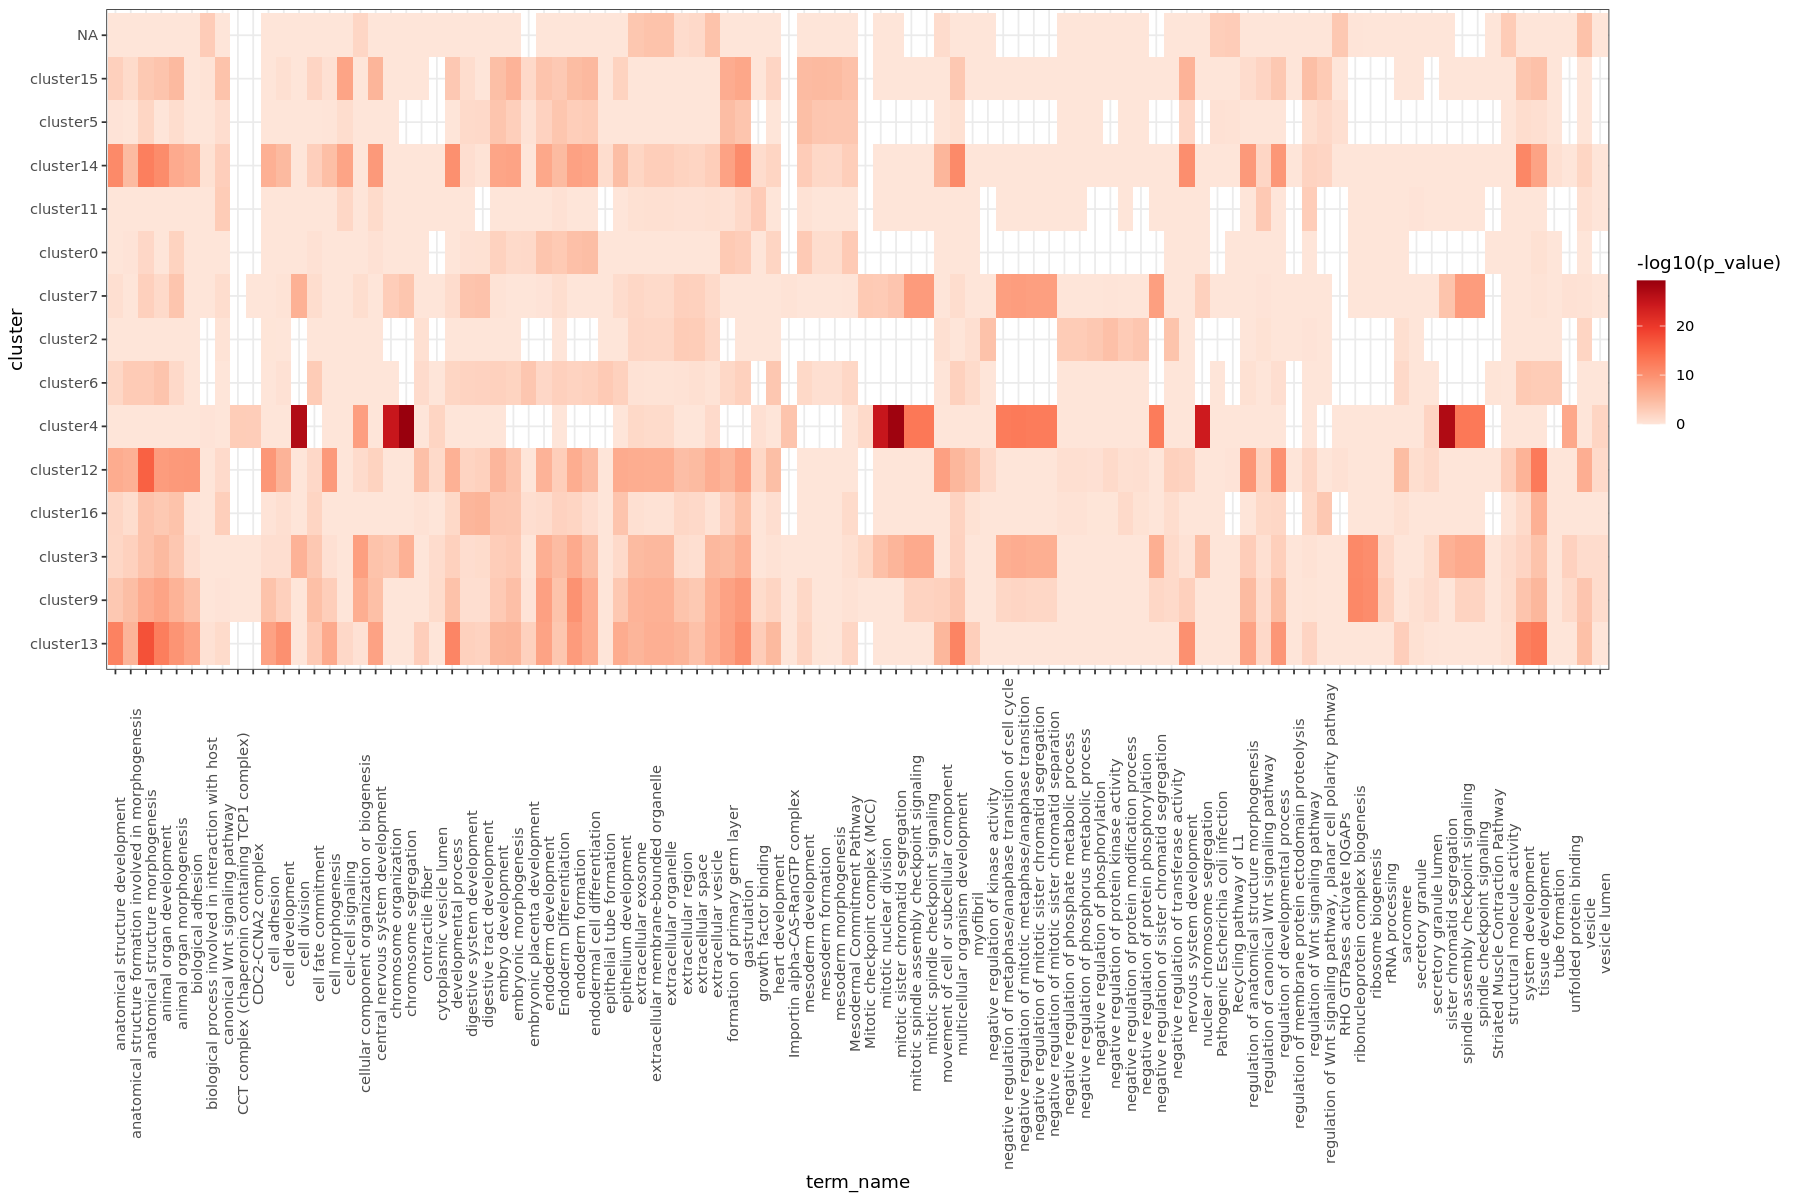

In [20]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))